In [22]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from datetime import datetime
from os import path
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import eli5
from eli5.sklearn import PermutationImportance
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

mpl.style.use('ggplot')

In [2]:
path_to_train = path.join(path.abspath('..'), 'data', 'train.csv')
train = pd.read_csv(path_to_train)

features = [col for col in train.columns if col not in ['id', 'target']]
obj_cols = [col for col in features if train[col].dtype == np.object]
num_cols = [col for col in features if train[col].dtype == np.float64]

train[obj_cols] = train[obj_cols].fillna(value='NAN')
train[num_cols] = train[num_cols].fillna(value=-1)

for col in obj_cols:    
    encoder = LabelEncoder()    
    train[col] = encoder.fit(train[col]).transform(train[col])

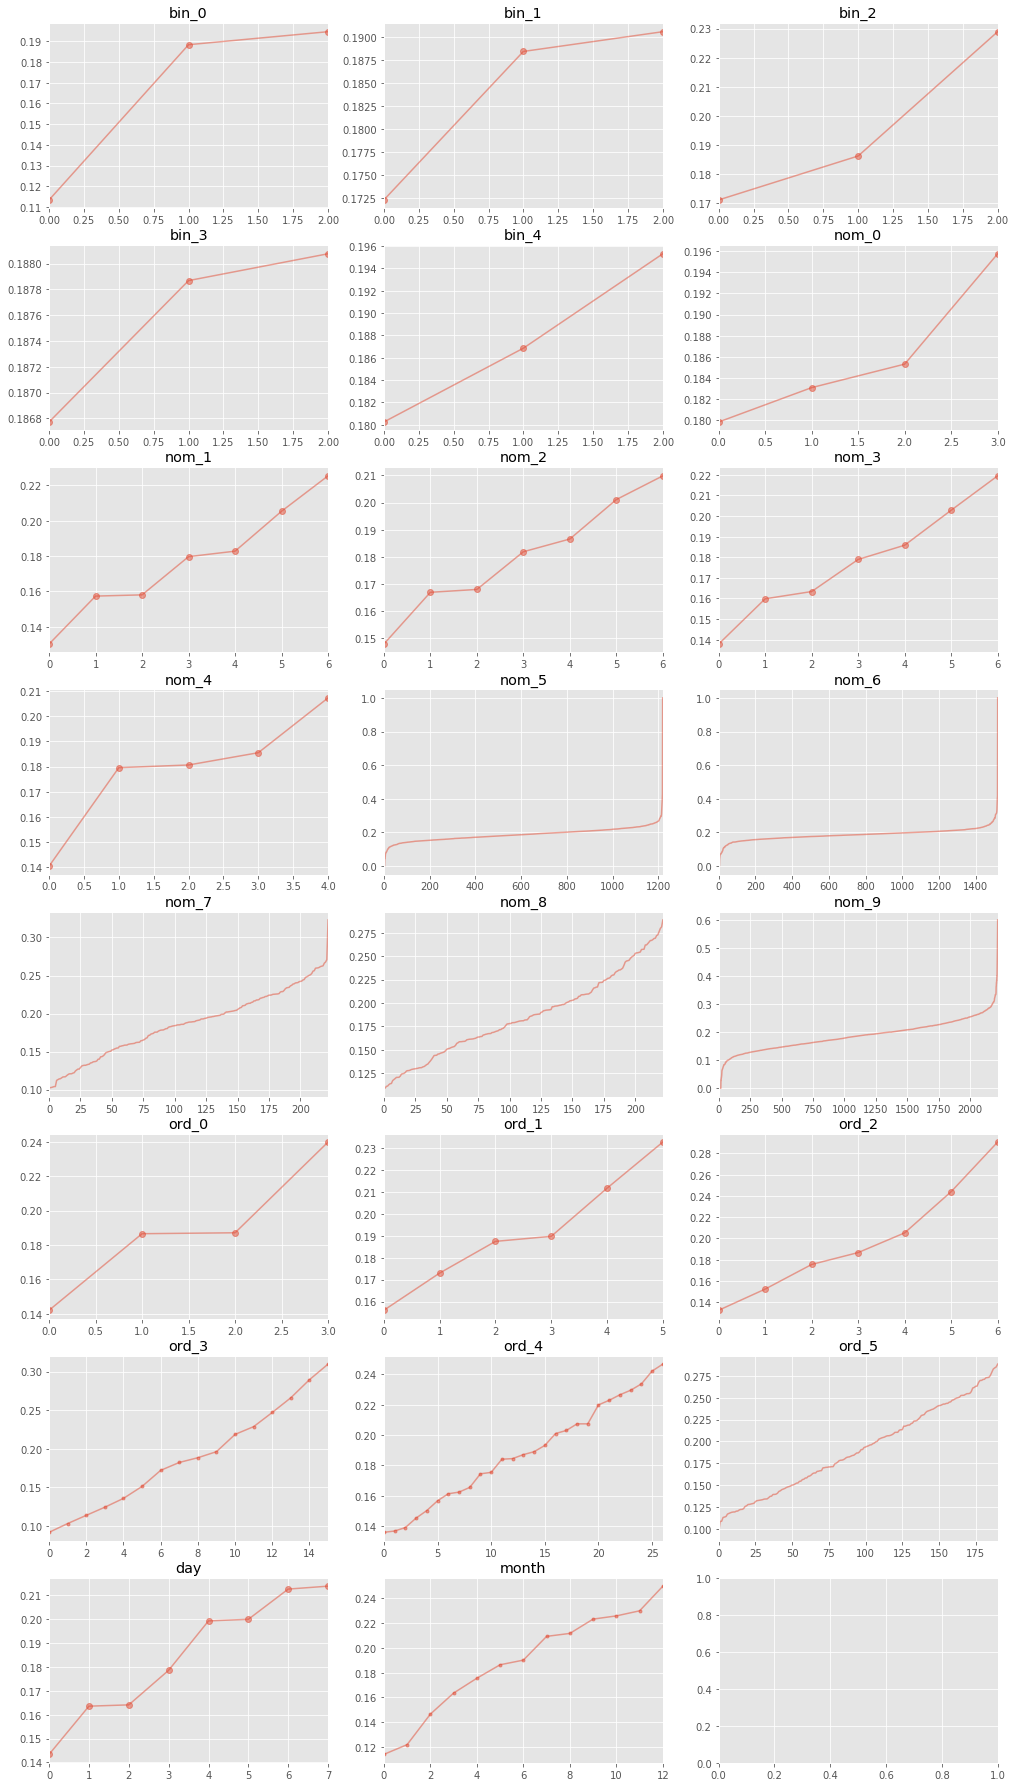

In [3]:
features = [col for col in train.columns if col not in ['id', 'target']]
ncols = 3
nrows = int(np.ceil(len(features) / ncols))
fig, ax = plt.subplots(nrows, ncols, figsize=(17,nrows * 4))

for i in range(nrows):
    for j in range(ncols):
        fid = ncols * i + j
        
        if fid < len(features):
            if train[features[fid]].nunique() <= 10:
                train.groupby(features[fid])['target'].mean().sort_values().reset_index(drop=True).plot(
                    ax=ax[i, j], alpha=0.5, title=features[fid], marker='o')
            elif train[features[fid]].nunique() <= 50:
                train.groupby(features[fid])['target'].mean().sort_values().reset_index(drop=True).plot(
                    ax=ax[i, j], alpha=0.5, title=features[fid], marker='.')
            else:
                train.groupby(features[fid])['target'].mean().sort_values().reset_index(drop=True).plot(
                    ax=ax[i, j], alpha=0.5, title=features[fid])
            ax[i, j].set_xlabel('')